<a href="https://colab.research.google.com/github/kpsalida/HospitalDischarges_Visualization/blob/Katerina/viz_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Dataset acquisition

The analysis utilizes the 2019 Hospital Inpatient Discharges (SPARCS De-Identified) dataset, publicly available through the New York State Open Data Portal (https://health.data.ny.gov/Health/Hospital-Inpatient-Discharges-SPARCS-De-Identified/4ny4-j5zv).  

SPARCS (Statewide Planning and Research Cooperative System) is a comprehensive administrative database that captures patient-level inpatient discharge records across New York State. The dataset includes clinical, operational, and financial variables such as length of stay (LOS), total charges, payer type, severity of illness, risk of mortality, and facility identifiers.

The dataset was restricted to discharges occurring in calendar year 2019 to avoid analysis inconsistencies arising from COVID-19 pandemic. Additionally it was narrowd to 3 Hospitals  Furthermore, the scope of the study was narrowed to  allow comparisons cross - facilities but also to maintain computational efficiency within the PowerBI environment. Two of the hospitals are major institutions in NYC while the third is more regional with a possibility of different LOS patterns and a different cost structure

With this filtering we are hoping for a more standardized performance comparison using normalized key performance indicators (KPIs), such as average LOS and average charges per discharge, independent of hospital size.   
#  
Each row in the dataset does not represent one patient but rather one discharge. So, we are analyzing discharges and this could occur to the same patient.  
#
Differences in discharge volume across hospitals were addressed using normalized performance metrics to ensure comparability.

# Import Libraries

In [187]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from google.colab import drive


In [188]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

# Explanation of Data Fields

**Hospital County**
Type is Char. Length is 11. A description of the county in which the hospital is located. Blank for records with enhanced de-identification.  
#  
**Facility Name**
Type is Char. Length is 112. The name of the facility where services were performed based on the Permanent Facility Identifier (PFI), as maintained by the NYSDOH Division of Health Facility Planning. For records with enhanced de-identification, ‘Redacted for Confidentiality’ appears.  

**Age Group**
Type is Char. Length is 11. Age in years at time of discharge. Grouped into the following age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older  

**Gender**
Type is Char. Length is 1. Patient gender: (M) Male, (F) Female, (U) Unknown.  

**Race**
Type is Char. Length is 32. Patient race. Black/African American, Multi-racial, Other Race, White. Other Race includes Native Americans and Asian/Pacific Islander.  

**Ethnicity**
Type is Char. Length is 20. Patient ethnicity. The ethnicity of the patient: Spanish/Hispanic Origin, Not of Spanish/Hispanic Origin, Multi-ethnic Unknown.  

**Length of Stay**
Type is Char. Length is 5. The total number of patient days at an acute level and/or other than acute care level (excluding leave of absence days) (Discharge Date - Admission Date) + 1. Length of Stay greater than or equal to 120 days has been aggregated to 120+ days  

**Type of Admission**
Type is Char. Length is 15. A description of the manner in which the patient was admitted to the health care facility: Elective, Emergency, Newborn, Not Available, Trauma, Urgent   

**Patient Disposition**
Type is Char. Length is 37. The patient's destination or status upon discharge  

**APR DRG Description ??**
Type is Char. Length is 500. The APR-DRG Classification Code Description in Calendar Year 2019, Version 36 of the APR- DRG Grouper. http://www.health.ny.gov/statistics/sparcs/sysdoc/appy.htm  
#
**APR Severity of Illness Description**
Type is Char. Length is 8. All Patient Refined Severity of Illness (APR SOI) Description: Undetermined (0), Minor (1), Moderate (2), Major (3), Extreme (4)  

**APR Risk of Mortality**
Type is Char. Length is 8. All Patient Refined Risk of Mortality (APR ROM) Description: Undetermined (0), Minor (1), Moderate (2), Major (3), Extreme (4).  
#
**Payment Typology 1**
Type is Char. Length is 25. A description of the type of payment for this occurrence.  

**Emergency Department Indicator**
Type is Char. Length is 1. The Emergency Department Indicator is set based on the submitted revenue codes. If the record contained an Emergency Department revenue code of 045X, the indicator is set to "Y", otherwise it will be “N”.  

**Total Charges**
Type is Char. Length is 8. Total charges for the discharge.  
#
**Total Costs**
Type is Char. Length is 8. Total estimated cost for the discharge.


# Column Selection

We excluded deep medical analysis with CCSR terms
All ids that might be confusing.  
Discharge year as our dataset is related only to 2019  
#
We selected the following features according to business logic:
#

**Identification**  
Hospital County  
Facility Name  

**Demographics**  
Age Group  
Gender  
Race / Ethnicity (only if you want social analysis — otherwise skip)    
  
**OPERATIONS**  
Length of Stay (IMPORTANT → convert to numeric)  
Type of Admission  
Emergency Department Indicator  
'Patient Disposition'
  
**FINANCIAL**  
Total Charges (convert to numeric)  
Total Costs (convert to numeric)  

**CLINICAL COMPLEXITY**  
APR Severity of Illness Description

APR Risk of Mortality

APR DRG Description      

**PAYER**

Payment Typology 1 (KEEP ONLY THIS)


# **About Low Variance Features**

# Mount Google Drive to access files.

In [228]:
# Mounts the drive; if already mounted, it just continues
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
#Jump directly into your specific project folder
%cd /content/drive/MyDrive/Colab Notebooks/FinalProject_Visualization

/content/drive/MyDrive/Colab Notebooks/FinalProject_Visualization


In [230]:
df = pd.read_csv('raw_hospital_discharges_2019.csv', low_memory = False)

# Retrospective Duplication Test

In [231]:
# Keep will
dup_groups = df[df.duplicated(keep=False)]
n_groups = dup_groups.groupby(list(df.columns)).ngroups
n_groups

117

In [232]:
dups_all = df.duplicated(keep=False)
df_dups_all = df[dups_all].sort_values(by=df.columns.tolist())
df_dups_all.shape[0]

1426

# 1st - Initial Identification of the dataframe.  


In [233]:
df.head()

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCSR Diagnosis Code,CCSR Diagnosis Description,CCSR Procedure Code,CCSR Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs
0,New York City,Kings,7001020,1305,Maimonides Medical Center,50 to 69,112,F,Other Race,Not Span/Hispanic,21,Urgent,Skilled Nursing Home,2019,INJ033,"COMPLICATION OF CARDIOVASCULAR DEVICE, IMPLANT...",CAR022,HEART VALVE REPLACEMENT AND OTHER VALVE PROCED...,162.0,CARDIAC VALVE PROCEDURES W AMI OR COMPLEX PDX,5.0,DISEASES AND DISORDERS OF THE CIRCULATORY SYSTEM,4.0,Extreme,Extreme,Surgical,Medicaid,Medicaid,Self-Pay,NaN,False,"$401,807.05","$100,294.11"
1,New York City,Kings,7001020,1305,Maimonides Medical Center,0 to 17,112,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,2019,RSP009,ASTHMA,ESA004,NON-INVASIVE VENTILATION,141.0,ASTHMA,4.0,DISEASES AND DISORDERS OF THE RESPIRATORY SYSTEM,3.0,Major,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,True,"$46,725.01","$23,058.16"
2,New York City,Kings,7001020,1305,Maimonides Medical Center,0 to 17,112,F,White,Unknown,1,Newborn,Home or Self Care,2019,PNL001,LIVEBORN,NaN,NaN,640.0,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",15.0,NEWBORNS AND OTHER NEONATES WITH CONDITIONS OR...,1.0,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,04100,False,"$3,393",$490.45
3,New York City,Kings,7001020,1305,Maimonides Medical Center,18 to 29,112,F,White,Unknown,2,Urgent,Home or Self Care,2019,PRG023,COMPLICATIONS SPECIFIED DURING CHILDBIRTH,PGN002,SPONTANEOUS VAGINAL DELIVERY,560.0,VAGINAL DELIVERY,14.0,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1.0,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,NaN,True,"$20,858.02","$5,445.28"
4,New York City,Kings,7001020,1305,Maimonides Medical Center,18 to 29,116,F,White,Not Span/Hispanic,2,Urgent,Home or Self Care,2019,PRG029,"UNCOMPLICATED PREGNANCY, DELIVERY OR PUERPERIUM",PGN004,ASSISTED VAGINAL DELIVERY,560.0,VAGINAL DELIVERY,14.0,"PREGNANCY, CHILDBIRTH AND THE PUERPERIUM",1.0,Minor,Minor,Medical,Medicaid,Medicaid,Self-Pay,NaN,False,"$21,116.01","$5,295.36"


In [234]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 53390
Number of Columns: 33


In [196]:
df.columns

Index(['Hospital Service Area', 'Hospital County',
       'Operating Certificate Number', 'Permanent Facility Id',
       'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race',
       'Ethnicity', 'Length of Stay', 'Type of Admission',
       'Patient Disposition', 'Discharge Year', 'CCSR Diagnosis Code',
       'CCSR Diagnosis Description', 'CCSR Procedure Code',
       'CCSR Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3', 'Birth Weight',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [235]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Operating Certificate Number,53390.0,6.748851e+06,461858.850345,5901000.0,7001020.0,7001020.0,7001020.0,7001020.0
Permanent Facility Id,53390.0,1.248337e+03,104.624142,1039.0,1305.0,1305.0,1305.0,1305.0
Discharge Year,53390.0,2.019000e+03,0.000000,2019.0,2019.0,2019.0,2019.0,2019.0
APR DRG Code,53377.0,4.372920e+02,229.146079,4.0,204.0,469.0,640.0,956.0
APR MDC Code,53377.0,1.082491e+01,5.516998,0.0,5.0,11.0,15.0,25.0
APR Severity of Illness Code,53377.0,2.036214e+00,1.006992,0.0,1.0,2.0,3.0,4.0


In [236]:
df.value_counts('APR DRG Description',dropna=False)

,count
APR DRG Description,
"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEONATE W OTHER PROBLEM",7555
VAGINAL DELIVERY,6066
SEPTICEMIA & DISSEMINATED INFECTIONS,3204
CESAREAN DELIVERY,2071
HEART FAILURE,1595
...,...
UNGROUPABLE,1
GASTRIC FUNDOPLICATION,1
CRANIOTOMY FOR MULTIPLE SIGNIFICANT TRAUMA,1


In [237]:
df.value_counts('Facility Name',dropna=False)

,count
Facility Name,
Maimonides Medical Center,41129
NewYork-Presbyterian/Hudson Valley Hospital,8258
St. Joseph's Medical Center,4003


In [238]:
df.value_counts('Permanent Facility Id',dropna=False)

,count
Permanent Facility Id,
1305,41129
1039,8258
1098,4003


In [239]:
df.value_counts('Payment Typology 3', dropna=False)

,count
Payment Typology 3,
Self-Pay,28722
NaN,20260
Medicaid,3977
Private Health Insurance,241
Blue Cross/Blue Shield,113
Medicare,49
Federal/State/Local/VA,28


In [240]:
df.value_counts('Type of Admission', dropna=False)

,count
Type of Admission,
Emergency,32419
Urgent,9117
Newborn,8338
Elective,3508
Not Available,8


In [241]:
df.value_counts('Emergency Department Indicator',dropna=False)

,count
Emergency Department Indicator,
True,30744
False,22646


In [204]:
df.value_counts('Patient Disposition',dropna=False)

,count
Patient Disposition,
Home or Self Care,36907
Skilled Nursing Home,6696
Home w/ Home Health Services,5831
Expired,1258
Left Against Medical Advice,944
Short-term Hospital,748
Inpatient Rehabilitation Facility,308
Hospice - Home,205
Hospice - Medical Facility,173


# Keep only selected columns

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53390 entries, 0 to 53389
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital Service Area                53390 non-null  object 
 1   Hospital County                      53390 non-null  object 
 2   Operating Certificate Number         53390 non-null  int64  
 3   Permanent Facility Id                53390 non-null  int64  
 4   Facility Name                        53390 non-null  object 
 5   Age Group                            53390 non-null  object 
 6   Zip Code - 3 digits                  52821 non-null  object 
 7   Gender                               53390 non-null  object 
 8   Race                                 53390 non-null  object 
 9   Ethnicity                            53390 non-null  object 
 10  Length of Stay                       53390 non-null  object 
 11  Type of Admission           

In [242]:

# columns to KEEP

columns_to_keep = [
    "Hospital County",
    "Facility Name",
    "Age Group",
    "Gender",
    "Race",
    "Ethnicity",
    "Length of Stay",
    "Type of Admission",
    "Patient Disposition",
    "APR DRG Description",
    "APR Severity of Illness Description",
    "APR Risk of Mortality",
    "Payment Typology 1",
    "Emergency Department Indicator",
    "Total Charges",
    "Total Costs"
]

df1 = df.copy()
df = df[columns_to_keep]

# Overview and Structure of my dataframe

In [243]:
df.head()

,Hospital County,Facility Name,Age Group,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,APR DRG Description,APR Severity of Illness Description,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,Total Charges,Total Costs
0,Kings,Maimonides Medical Center,50 to 69,F,Other Race,Not Span/Hispanic,21,Urgent,Skilled Nursing Home,CARDIAC VALVE PROCEDURES W AMI OR COMPLEX PDX,Extreme,Extreme,Medicaid,False,"$401,807.05","$100,294.11"
1,Kings,Maimonides Medical Center,0 to 17,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,ASTHMA,Major,Moderate,Medicaid,True,"$46,725.01","$23,058.16"
2,Kings,Maimonides Medical Center,0 to 17,F,White,Unknown,1,Newborn,Home or Self Care,"NEONATE BIRTHWT >2499G, NORMAL NEWBORN OR NEON...",Minor,Minor,Medicaid,False,"$3,393",$490.45
3,Kings,Maimonides Medical Center,18 to 29,F,White,Unknown,2,Urgent,Home or Self Care,VAGINAL DELIVERY,Minor,Minor,Medicaid,True,"$20,858.02","$5,445.28"
4,Kings,Maimonides Medical Center,18 to 29,F,White,Not Span/Hispanic,2,Urgent,Home or Self Care,VAGINAL DELIVERY,Minor,Minor,Medicaid,False,"$21,116.01","$5,295.36"


In [244]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 53390
Number of Columns: 16


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53390 entries, 0 to 53389
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Hospital County                      53390 non-null  object
 1   Facility Name                        53390 non-null  object
 2   Age Group                            53390 non-null  object
 3   Gender                               53390 non-null  object
 4   Race                                 53390 non-null  object
 5   Ethnicity                            53390 non-null  object
 6   Length of Stay                       53390 non-null  object
 7   Type of Admission                    53390 non-null  object
 8   Patient Disposition                  53390 non-null  object
 9   APR DRG Description                  53377 non-null  object
 10  APR Severity of Illness Description  53376 non-null  object
 11  APR Risk of Mortality                5337

## **Data Types**

In [246]:
# Convert Total Charges and Total Costs to numeric Fields
df["Total Charges"] = df["Total Charges"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)
df["Total Costs"] = df["Total Costs"].str.replace("$", "", regex=False).str.replace(",", "", regex=False).astype(float)


There is an issue with the LOS variable. For LOS > = 120, then they are bucketed into 120 + categorization making the column object. We are going to bucket these safely into 120. It is only 45 occurences.

In [250]:
(df["Length of Stay"] == "120 +").sum()

np.int64(45)

In [251]:
df['Length of Stay'] = df['Length of Stay'].replace('120 +', '120')

In [252]:
#Sanity Check
(df["Length of Stay"] == "120 +").sum()

np.int64(0)

In [255]:
(df["Length of Stay"] == "0").sum()

np.int64(0)

In [254]:

df["Length of Stay"] = pd.to_numeric(df["Length of Stay"])

## **Missing Values**

In [256]:
df.isna().sum()

,0
Hospital County,0
Facility Name,0
Age Group,0
Gender,0
Race,0
Ethnicity,0
Length of Stay,0
Type of Admission,0
Patient Disposition,0
APR DRG Description,13


In [257]:
#Find the percentage of missing overall in the dataframe
missing = df.isnull().sum().sum()
total_values = df.shape[0] * df.shape[1]

overall_missing_pct = (missing / total_values) * 100

print(f"Overall missing percentage: {overall_missing_pct:.4f}%")

Overall missing percentage: 0.0048%


Since the overall missing are 0.005%, then we can safely dropna


In [258]:
df.dropna(inplace=True)

In [259]:
#sanity check for nulls
df.isna().sum().sum()

np.int64(0)

## Identify Columns with low variance

In [260]:
counts = df.nunique()
check_cols_lowvariance = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
check_cols_lowvariance

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

We cannot drop all these important columns. **The reason being that we do not care about low variance in our case.** Regarding Gender, or facility name . It is ok to have low variance.

In [261]:
counts

,0
Hospital County,2
Facility Name,3
Age Group,5
Gender,2
Race,4
Ethnicity,4
Length of Stay,109
Type of Admission,5
Patient Disposition,16
APR DRG Description,307


## Check Duplicate data


In [262]:
df.duplicated().sum()


np.int64(2631)

In [263]:
dup_groups = df[df.duplicated(keep=False)]
n_groups = dup_groups.groupby(list(df.columns)).ngroups
n_groups

633

In [264]:
dups_all = df.duplicated(keep=False)
df_dups_all = df[dups_all].sort_values(by=df.columns.tolist())
df_dups_all.shape[0]

3264

**Duplicate analysis has shown that the number of identical records increased after feature selection due to the removal of distinguishing variables. These duplicates are not different observations but rather unique discharge patients that share the same characteristics. Therefore, no records were deleted since there is no patient identifier**

| Stage                   | Duplicate Groups | Duplicate Rows |
| ----------------------- | ---------------- | -------------- |
| Before dropping columns | 117              | 1,526          |
| After dropping columns  | 633              | 3,264          |


# Understanding Variables - Univariate Analysis

In [265]:
# After conversion
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [266]:
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: Index(['Length of Stay', 'Total Charges', 'Total Costs'], dtype='object')
Categorical Columns: Index(['Hospital County', 'Facility Name', 'Age Group', 'Gender', 'Race',
       'Ethnicity', 'Type of Admission', 'Patient Disposition',
       'APR DRG Description', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'Payment Typology 1',
       'Emergency Department Indicator'],
      dtype='object')


In [267]:
df[numeric_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length of Stay,53376.0,4.982633,7.395185,1.00,2.0000,3.00,5.0000,120.00
Total Charges,53376.0,54361.518212,90230.004842,1560.00,18483.0150,30802.52,56712.9750,4409949.53
Total Costs,53376.0,16643.424635,23230.879414,88.27,5799.1675,10314.10,18997.5425,789031.39


In [268]:
# Summary statistics
summary = df[numeric_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T
summary["skew"] = df[numeric_cols].skew(numeric_only=True)
summary

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max,skew
Length of Stay,53376.0,4.982633,7.395185,1.00,1.00,1.00,2.0000,3.00,5.0000,15.000,35.0000,120.00,7.500140
Total Charges,53376.0,54361.518212,90230.004842,1560.00,5103.96,6319.00,18483.0150,30802.52,56712.9750,172896.575,388461.3800,4409949.53,10.225547
Total Costs,53376.0,16643.424635,23230.879414,88.27,843.12,1012.82,5799.1675,10314.10,18997.5425,51509.540,106921.1525,789031.39,7.438960


**LOS**  
LOS is highly right-skewed, with a median of 3 days and a mean of 4.9 days. While most discharges occur within 5 days, a small number of cases extend to significantly longer durations, reflecting complex or severe conditions. Only 4% remain more than 15 days

**Total Charges**  
 exhibit a highly right-skewed distribution, with a median of approximately $30,774 and a mean of $53,541. A small proportion of cases accounts for extremely high charges, as indicated by the 99th percentile exceeding $379,000 and a maximum above $2.3 million.

 **Total Costs**  
 also demonstrate significant right-skewness, with a median of approximately $10,304 and a mean of $16,443. Similar to total charges, a small number of cases incur substantially higher costs.”

**Numeric Columns Distributions**

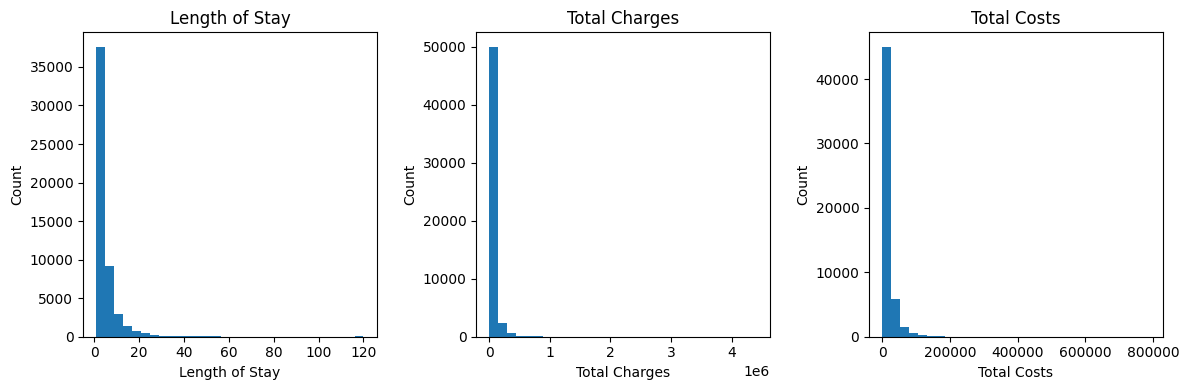

In [269]:
numeric_cols = list(df.select_dtypes(include="number").columns)

n = len(numeric_cols)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

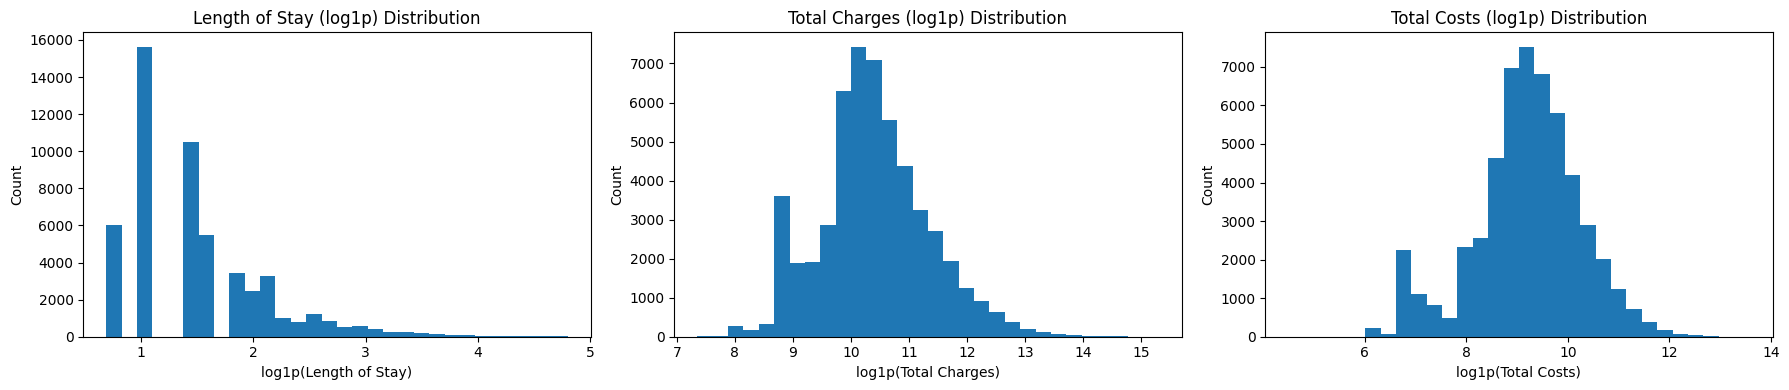

In [270]:
num_cols = ["Length of Stay", "Total Charges", "Total Costs"]
num_cols = [c for c in num_cols if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

# If only one numeric column, make axes iterable
if len(num_cols) == 1:
    axes = [axes]

for i, col in enumerate(num_cols):
    x = df[col].dropna()
    axes[i].hist(np.log1p(x), bins=30)
    axes[i].set_title(f"{col} (log1p) Distribution")
    axes[i].set_xlabel(f"log1p({col})")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

“Log-transformed distributions of Length of Stay, Total Charges, and Total Costs show an almost norma shape.  **log-normal distributions**
**This suggests that extreme values observed in the raw data are not anomalies but characteristics of healthcare utilization, where a only a very small number of cases incur disproportionately high costs.”

Total Charges and Total costs seem to follow the same shape. **STRONG RELATIONSHIP**